In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from pylab import savefig
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.linear_model import LinearRegression
import pickle
import warnings; 
warnings.simplefilter('ignore')
from fbprophet import Prophet

In [2]:
df = pd.read_csv(r"C:\Users\Sheikh Nabil\Anaconda\Desktop\Capital bikeshare\Week 4\facebook prophet\newdata1.csv")

In [3]:
df

,Unnamed: 0,date,month,hour,holiday,weekday,Member type,count
0,0,2018-01-01,January,0,No,Monday,Casual,6
1,1,2018-01-01,January,0,No,Monday,Member,28
2,2,2018-01-01,January,1,No,Monday,Casual,11
3,3,2018-01-01,January,1,No,Monday,Member,38
4,4,2018-01-01,January,2,No,Monday,Casual,7
...,...,...,...,...,...,...,...,...
33905,33905,2019-12-31,December,21,No,Tuesday,Member,101
33906,33906,2019-12-31,December,22,No,Tuesday,Casual,9
33907,33907,2019-12-31,December,22,No,Tuesday,Member,71
33908,33908,2019-12-31,December,23,No,Tuesday,Casual,24


In [24]:
df['count'].sum()

6941101

In [12]:
new_df = df.drop(columns=['Unnamed: 0','month','hour','holiday','weekday','Member type'])

In [13]:
new_df

,date,count
0,2018-01-01,6
1,2018-01-01,28
2,2018-01-01,11
3,2018-01-01,38
4,2018-01-01,7
...,...,...
33905,2019-12-31,101
33906,2019-12-31,9
33907,2019-12-31,71
33908,2019-12-31,24


In [21]:
new_df[new_df['date'] == '2018-01-01'].sum()

count    1213
dtype: int64

In [17]:
new_df.dtypes

date     datetime64[ns]
count             int64
dtype: object

In [16]:
new_df['date'] = pd.to_datetime(new_df['date'])

In [46]:
s1 = new_df.groupby([ 'date']).sum()
s1
s2 = s1.reset_index()
s2
s2.columns = ['ds','y']
s2



,ds,y
0,2018-01-01,1213
1,2018-01-02,3792
2,2018-01-03,4748
3,2018-01-04,2368
4,2018-01-05,2709
...,...,...
725,2019-12-27,4916
726,2019-12-28,6282
727,2019-12-29,1409
728,2019-12-30,5419


In [47]:
m = Prophet(interval_width=0.95, yearly_seasonality=True)
model = m.fit(s2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future = m.make_future_dataframe(periods=840,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,9885.694011,-464.820335,8143.598167,9885.694011,9885.694011,-5832.102498,-5832.102498,-5832.102498,-325.957395,-325.957395,-325.957395,-5506.145103,-5506.145103,-5506.145103,0.0,0.0,0.0,4053.591513
1,2018-01-02,9884.647473,66.188789,8950.038134,9884.647473,9884.647473,-5210.607399,-5210.607399,-5210.607399,263.193294,263.193294,263.193294,-5473.800693,-5473.800693,-5473.800693,0.0,0.0,0.0,4674.040074
2,2018-01-03,9883.600935,486.528246,9495.939252,9883.600935,9883.600935,-4874.484119,-4874.484119,-4874.484119,551.647549,551.647549,551.647549,-5426.131668,-5426.131668,-5426.131668,0.0,0.0,0.0,5009.116816
3,2018-01-04,9882.554398,725.655069,9232.869461,9882.554398,9882.554398,-4897.165023,-4897.165023,-4897.165023,467.641884,467.641884,467.641884,-5364.806907,-5364.806907,-5364.806907,0.0,0.0,0.0,4985.389375
4,2018-01-05,9881.507860,797.595199,9197.991798,9881.507860,9881.507860,-4847.657088,-4847.657088,-4847.657088,444.068480,444.068480,444.068480,-5291.725569,-5291.725569,-5291.725569,0.0,0.0,0.0,5033.850772


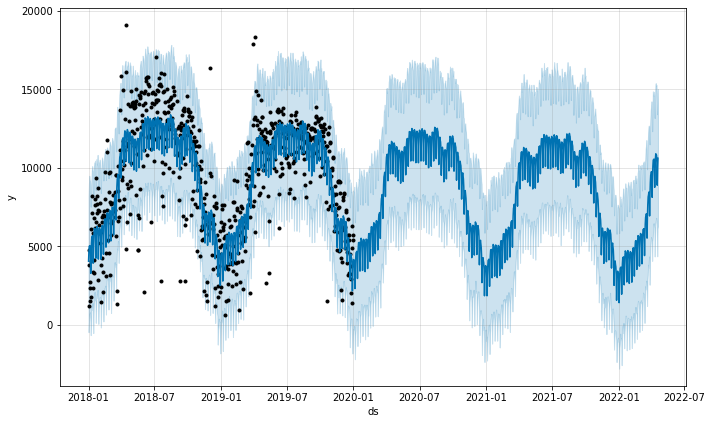

In [49]:
plot1 = m.plot(forecast)

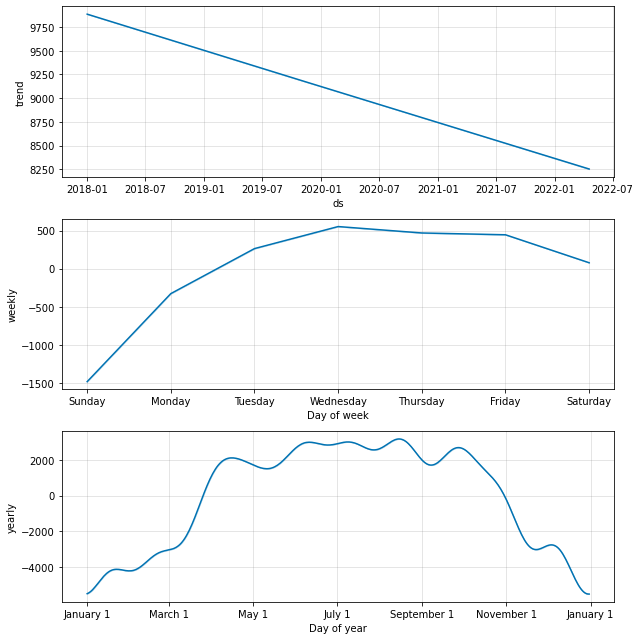

In [50]:
plt2 = m.plot_components(forecast)